**Online investment platform that sells mutual funds**

Please use CaseFundCustomer.csv and CaseFundRecommend.csv to work on the assignment questions
below. Please use Python code and run them in the Google Colab environment.

The retail investor market is growing by leaps and bounds. In 2020, average daily net buying individuals of U.S. listed equities increased fivefold compared to pre-2020 to $1 billion and continued to rise an additional 30% by early May 2021. On top of a record-breaking spike in new brokerage accounts opened in 2020, retail brokerages reported unprecedented average daily volumes for equity and options trades. At the same time, technological advancements have brought easy-to-use investment platforms that further facilitate the growth in the number of retail investors. For instance, Robinhood has grown its funded accounts, those which have bank accounts linked to them, to 18 million in March of 2021 from 7.2 million in March of 2020, an increase of 151%. With such an outstanding trend of growing retail investors making investments on online platforms, it is more crucial than ever to study how they make decisions on those platforms. The e-commercialization of online investment platform has brought firms data describing how investors make their decisions online and offered opportunities to better understand how investors convert from search to purchase.


In this case, we collect data from an online investment platform that sells mutual funds. Data: CaseFundCustomer.csv describes customer historical activities. This firm wants to design an algorithm to conduct personalized recommendation. They have done several campaigns to send recommended funds to customers. Data: CaseFundRecommend.csv records whether customer buy the recommended funds.


**Please do not preprocess the data in this assignment.
Your interpretation for any non-intercept coefficients should follow the interpretation shown in the class. Please point out the baseline group and the focal group when applicable.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

file_path_1 = '/content/drive/MyDrive/Data/CaseFundCustomer.csv'
file_path_2 = '/content/drive/MyDrive/Data/CaseFundRecommend.csv'

df_customer= pd.read_csv(file_path_1)
df_recommend= pd.read_csv(file_path_2)

'''
df = pd.merge(df_customer, df_recommend, on='Customer_ID', how='inner')
'''

"\ndf = pd.merge(df_customer, df_recommend, on='Customer_ID', how='inner')\n"

In [30]:
print(df_customer.info())
print(df_customer.describe())
print("Missing Values:\n", df_customer.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           4286 non-null   object 
 1   time              4286 non-null   float64
 2   type_cnt          4286 non-null   int64  
 3   num_search_click  4286 non-null   float64
 4   risk_level_mean   4286 non-null   float64
 5   risk_level_std    4286 non-null   float64
 6   rw1               4286 non-null   float64
 7   risk_level_buy    4286 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 268.0+ KB
None
              time     type_cnt  num_search_click  risk_level_mean  \
count  4286.000000  4286.000000       4286.000000      4286.000000   
mean    130.935708     3.046664         40.405337         2.773309   
std     157.730368     1.320396         87.822251         0.361900   
min       0.000000     1.000000          1.000000         1.000000   
25%  

In [31]:
print(df_recommend.info())
print(df_recommend.describe())
print("Missing Values:\n", df_recommend.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     20000 non-null  object 
 1   fund_code   20000 non-null  int64  
 2   type1       20000 non-null  object 
 3   rw1         20000 non-null  float64
 4   risk_level  20000 non-null  int64  
 5   score_all   20000 non-null  float64
 6   buy         20000 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB
None
          fund_code           rw1    risk_level     score_all           buy
count   20000.00000  20000.000000  20000.000000  20000.000000  20000.000000
mean   127219.03105      0.141949      2.885150     60.228310      0.189150
std    166000.30527      1.834095      0.711888     12.489302      0.391638
min         3.00000     -9.990010      1.000000      0.000000      0.000000
25%       988.00000     -0.007100      3.000000     53.766964      0.000000


## Q1.

Use the variables from time to risk_level_buy in CaseFundCustomer.csv and determine the optimal number of clusters based on the method taught in class. Please interpret the result.

- Note: Please use KElbowVisualizer shown below. KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)

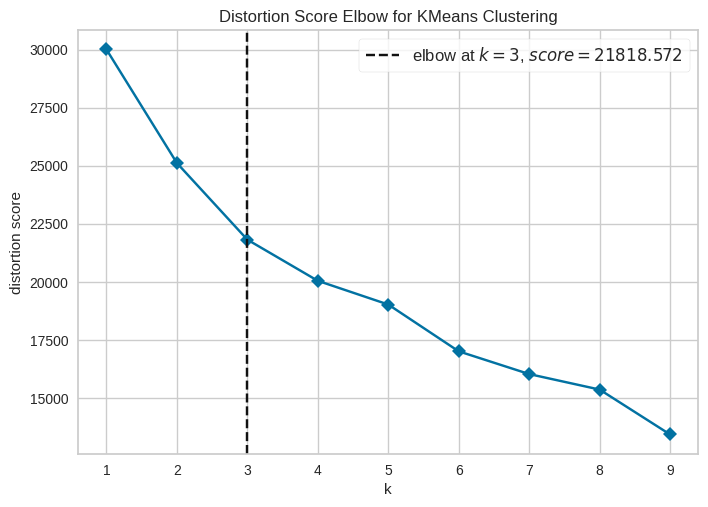

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Select Variables
variables = ['time', 'type_cnt', 'num_search_click', 'risk_level_mean', 'risk_level_std', 'rw1', 'risk_level_buy']
df_selected = df_customer[variables]

# Data Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Generate KMeans Model
kmeans = KMeans(random_state=42)

# Find Optimal Number of Cluster using KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)
visualizer.fit(scaled_data)
visualizer.show()

- **Interpretation:**
  - The “elbow” in this graph occurs at `k = 3`, which is highlighted by the vertical dashed line.
  - At `k = 3`, the distortion score approximates 21818.57. After this point, the decrease in distortion score becomes less significant.
  - This indicates that dividing the data into 3 clusters is the optimal choice, balancing model complexity and the amount of variance explained.

- **Implication:**
  - `k = 3` provides a good balance between underfitting (too few clusters) and overfitting (too many clusters).
  - Moving forward, using  k = 3  for K-Means clustering will allow us to group customers into three distinct clusters, which can be analyzed to understand their distinguishing characteristics.

## Q2.

Use the variables from time to risk_level_buy in CaseFundCustomer.csv and perform a cluster analysis using the K-Means algorithm with the number of clusters determined in Question 1 to divide the customers into groups. Provide an interpretation of each cluster, describing the distinguishing characteristics of each group.

cluster summary:
               time  type_cnt  num_search_click  risk_level_mean  \
Cluster                                                            
0        133.975921  4.544629         90.943425         2.842898   
1        139.423863  2.240924         18.885710         3.041883   
2        119.287182  2.522429         16.796562         2.429011   

         risk_level_std       rw1  risk_level_buy  
Cluster                                            
0              0.739987  0.121247        2.757379  
1              0.482407  0.025230        3.142198  
2              0.642073  0.262096        2.119440  


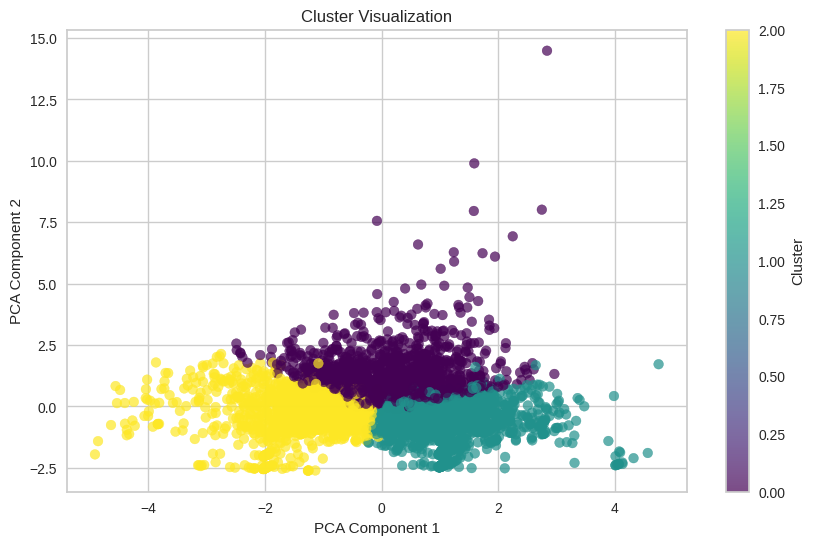

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Select Variables
variables = ['time', 'type_cnt', 'num_search_click', 'risk_level_mean', 'risk_level_std', 'rw1', 'risk_level_buy']
df_selected = df_customer[variables]

# Data Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform KMeans Clustering based on optimal number
optimal_clusters = 3  # Replace with the actual optimal number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add Cluster Results to Original Data
df_customer['Cluster'] = clusters

# Analyze Properties of Each Cluster
cluster_summary = df_customer.groupby('Cluster')[variables].mean()
print("cluster summary:")
print(cluster_summary)

# Visualize Cluster(using PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Based on the cluster summary and visualization provided, here’s an interpretation of the three clusters with distinguishing characteristics:

**Cluster 0: High Interaction and Moderate Risk Preference**

	•	Time spent: 133.98 (relatively high)
	•	Type count: 4.54 (exploring more fund types per session compared to other clusters)
	•	Search clicks: 90.94 (very high interaction)
	•	Risk level mean: 2.84 (moderate risk preference)
	•	Risk level buy: 2.75 (slightly lower than the average risk they explore)
	•	Weekly return: 0.12 (low)

- **Interpretation:**
This group is highly interactive and spends significant time exploring many fund types. They tend to choose funds with a moderate level of risk, but their purchase behavior reflects slightly lower risk tolerance compared to what they explore.

**Cluster 1: Moderate Interaction and High Risk Preference**

	•	Time spent: 139.42 (highest across clusters)
	•	Type count: 2.24 (narrow focus on fewer fund types)
	•	Search clicks: 18.89 (low interaction)
	•	Risk level mean: 3.04 (highest risk preference)
	•	Risk level buy: 3.14 (aligns with their exploratory risk preference)
	•	Weekly return: 0.03 (very low)

- **Interpretation:**
This group is deliberate, spending the most time per session but interacting less overall. They have the highest risk preference both in exploration and purchases, likely targeting high-risk, high-reward investments.

**Cluster 2: Low Interaction and Low Risk Preference**

	•	Time spent: 119.29 (lowest)
	•	Type count: 2.52 (focused on a few fund types)
	•	Search clicks: 16.80 (least interactive group)
	•	Risk level mean: 2.43 (low risk preference)
	•	Risk level buy: 2.12 (even more conservative than their exploratory behavior)
	•	Weekly return: 0.26 (highest among clusters)

- **Interpretation:**
This group is the least interactive, spending the least time and exploring fewer fund types. They prefer low-risk investments and are conservative in their purchases, showing risk-averse behavior. Their investments yield the highest weekly return, indicating a preference for steady, reliable funds.

- **Overall Insights:**

1. Cluster 0 could represent active explorers who are moderately risk-tolerant but make conservative choices when purchasing funds.
2. Cluster 1 represents risk takers, focusing on high-risk funds with lower interaction.
3. Cluster 2 represents risk-averse investors, engaging minimally and focusing on stable, low-risk investments.

- **Visualization Analysis:**

The PCA visualization shows how the clusters are distributed in reduced dimensions. The clusters are reasonably well-separated, with `Cluster 0`(yellow) appearing spread out, reflecting diverse behavior. `Clusters 1`(purple) and `Cluster 2`(teal) are more compact, indicating more consistent behavior patterns within these groups.

## Q3.

Build a logit model with buy being 1 as the dependent variable and the variables from type1 to score_all in CaseFundRecommend.csv as well as the clusters derived from Question 2 as independent variables. Interpret all significant coefficients in your model. Address the following questions in your interpretation:
- Which type of mutual funds are most likely to be bought?
- Which customer cluster is most likely to purchase the recommended funds?
- Do customers tend to buy higher-risk funds when they are recommended?

In [23]:
import pandas as pd
import statsmodels.api as sm

df_recommend_with_clusters = pd.merge(df_recommend, df_customer[['user_id', 'Cluster']], on='user_id', how='left')

print(df_recommend_with_clusters.head())
print(df_recommend_with_clusters.info())

            user_id  fund_code  type1       rw1  risk_level  score_all  buy  \
0  000549077743D83B        742    mix  0.004297           3  64.117143    0   
1  000549077743D83B        870    mix  0.013548           3  51.048571    0   
2  000549077743D83B       1691   QDII -0.014239           3  36.660000    0   
3  000549077743D83B     110029    mix  3.627903           4  38.997768    0   
4  000549077743D83B     160625  stock -0.003381           4  26.320000    0   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     20000 non-null  object 
 1   fund_code   20000 non-null  int64  
 2   type1       20000 non-null  object 
 3   rw1         20000 non-null  float64
 4   risk_level  20000 non-null  int64  
 5   score_all   20000 non-null  float64
 6   buy   

In [25]:
import statsmodels.formula.api as smf

# Transform 'Cluster' to categorical
df_recommend_with_clusters['Cluster'] = df_recommend_with_clusters['Cluster'].astype('category')

# Define the formula: 'buy ~ type1 + rw1 + risk_level + score_all + C(Cluster)'
formula = 'buy ~ C(type1) + rw1 + risk_level + score_all + C(Cluster)'

# Fit the logistic regression model using smf
logit_model = smf.logit(formula=formula, data=df_recommend_with_clusters)
result = logit_model.fit()

# Display the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.456715
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19989
Method:                           MLE   Df Model:                           10
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.05830
Time:                        16:26:35   Log-Likelihood:                -9134.3
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                1.145e-236
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.0031      0.181    -11.065      0.000      -2.358      -1.648

**Logit Regression Results Interpretation**

1. Model Performance
- Pseudo R-squared: 0.0583 → The model explains 5.83% of the variance in the dependent variable (buy). While this value is typical for logistic regression, higher values may require additional predictors or nonlinear effects.
- LLR p-value: Highly significant (p < 0.001) → The overall model is statistically significant.

2. Significant Variables
- Significant variables (p-value < 0.05):
  - C(type1)[T.mix]
  - C(type1)[T.others]
  - C(type1)[T.stock]
  - C(Cluster)[T.1]
  - C(Cluster)[T.2]
  - risk_level
  - score_all
- Not Significant (p-value > 0.05):
  - These are indicating they have no meaningful impact on the likelihood of purchase.
  - C(type1)[T.bond]
  - C(type1)[T.monetary]
  - rw1

**Answers for Questions**
1. **Which type of mutual funds are most likely to be bought?**
- Mix funds are the most likely to be bought, followed by stock funds and other funds.
  - C(type1)[T.mix]: Coefficient = 0.3678, p-value < 0.001 → Mix funds have the highest likelihood of being purchased.
  - C(type1)[T.stock]: Coefficient = 0.3514, p-value < 0.001 → Stock funds are also significantly likely to be bought.
  - C(type1)[T.others]: Coefficient = 0.4766, p-value < 0.001 → Other funds (others) are also preferred.
  - C(type1)[T.bond] and C(type1)[T.monetary] are not statistically significant, indicating they do not meaningfully impact purchase likelihood.


2. **Which customer cluster is most likely to purchase the recommended funds?**
- Customers in Cluster 1 are the most likely to purchase recommended funds.**
  - C(Cluster)[T.1]: Coefficient = 1.3198, p-value < 0.001 → Customers in Cluster 1 are the most likely to purchase recommended funds.
  - C(Cluster)[T.2]: Coefficient = 0.7990, p-value < 0.001 → Customers in Cluster 2 are also likely to purchase, but less so than Cluster 1.
  - Cluster 0 serves as the reference group, and both Cluster 1 and Cluster 2 exhibit significantly higher purchase probabilities than Cluster 0.


3. **Do customers tend to buy higher-risk funds when they are recommended?**

- Customers tend to avoid higher-risk funds, preferring funds with lower risk levels. Higher risk levels are associated with a statistically significant decrease in purchase probability.

## Q4.

Please build a model that examines customers’ heterogeneous preference for the risk level when purchasing mutual funds. Based on your model, recommend which cluster should be targeted for high- risk mutual fund recommendations. Provide a detailed interpretation of the relevant coefficients to support your suggestion.

In [26]:
import statsmodels.formula.api as smf

# Ensure Cluster is treated as a categorical variable
df_recommend_with_clusters['Cluster'] = df_recommend_with_clusters['Cluster'].astype('category')

# Build the logistic regression model with interaction terms
formula = 'buy ~ risk_level * C(Cluster) + type1 + rw1 + score_all'
logit_model = smf.logit(formula=formula, data=df_recommend_with_clusters)
result = logit_model.fit()

# Display the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450597
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19987
Method:                           MLE   Df Model:                           12
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.07091
Time:                        16:40:56   Log-Likelihood:                -9011.9
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                2.487e-287
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.9896      0.202     -9.836      0.000      

**Interpretation of the Model Results**

The logistic regression model examines the likelihood of customers purchasing mutual funds, focusing on their preferences for risk_level and its interaction with clusters.

**Key Findings**

1. Risk Level(Baseline Effect):
- **Coefficient for risk_level = -0.2514, p-value < 0.001**: For the reference cluster(Cluster 0), as risk_level increases, the likelihood of purchasing the mutual fund decreases significantly. Customers in Cluster 0 are risk-averse.

2. Cluster-Specific Effects:
- **C(Cluster)[T.1] Coefficient = -0.4818, p-value = 0.032**: Cluster 1 has a significantly lower base likelihood of purchasing compared to Cluster 0, independent of risk level.
- **C(Cluster)[T.2] Coefficient = 2.6550, p-value < 0.001**: Cluster 2 has a significantly higher base likelihood of purchasing compared to Cluster 0, independent of risk level.

3. Interaction Terms:
- risk_level:C(Cluster)[T.1]: 0.5775, p-value < 0.001.
  - In Cluster 1, as risk_level increases, the likelihood of purchasing increases significantly. This suggests that Cluster 1 customers are more likely to prefer higher-risk funds compared to Cluster 0.
- risk_level:C(Cluster)[T.2]: -0.7446, p-value < 0.001.
  - In Cluster 2, as risk_level increases, the likelihood of purchasing decreases significantly. This suggests that Cluster 2 customers are even more risk-averse than Cluster 0.

**Cluster Recommendation for High-Risk Funds**

**Target Cluster: Cluster 1**
- The interaction term risk_level:C(Cluster)[T.1] (coefficient = 0.5775, p-value < 0.001) shows that Cluster 1 customers are significantly more likely to purchase high-risk funds as the risk_level increases.
- Although Cluster 1 has a lower base likelihood of purchasing funds (C(Cluster)[T.1] = -0.4818), their preference for higher-risk funds makes them the ideal target for high-risk mutual fund recommendations.

**Detailed Recommendations**
1. High-Risk Fund Targeting:
- Focus on Cluster 1 when promoting high-risk mutual funds.
- Use tailored marketing strategies emphasizing high-risk, high-reward potential to appeal to their preferences.

2. Avoid High-Risk Promotion for Cluster 2:
- The significant negative interaction (risk_level:C(Cluster)[T.2] = -0.7446) indicates that Cluster 2 customers are strongly risk-averse and should not be targeted for high-risk mutual funds.

3. Cluster 0 Strategy:
- Cluster 0 shows moderate risk aversion (risk_level coefficient = -0.2514). They may respond better to low or medium-risk fund recommendations.

## Q5.

Please build a model that examines customers’ heterogeneous preference for the fund type when purchasing mutual funds. Based on your findings, suggest which cluster would be most receptive to recommendations for monetary funds. Use the coefficients in your model to justify your recommendation.

In [27]:
import statsmodels.formula.api as smf

# Ensure Cluster is treated as a categorical variable
df_recommend_with_clusters['Cluster'] = df_recommend_with_clusters['Cluster'].astype('category')

# Build the logistic regression model with interaction terms for fund type and cluster
formula = 'buy ~ C(type1) * C(Cluster) + rw1 + risk_level + score_all'
logit_model = smf.logit(formula=formula, data=df_recommend_with_clusters)
result = logit_model.fit()

# Display the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.454563
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19979
Method:                           MLE   Df Model:                           20
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.06273
Time:                        16:56:54   Log-Likelihood:                -9091.3
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                1.732e-245
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8729      0.1

**Model Results Interpretation**

The logistic regression model examines how customer preferences for fund types, particularly monetary funds, vary across clusters. Below is a detailed analysis:

**Key Findings for Monetary Funds**

1. Base Effect for Monetary Funds:
- **C(type1)[T.monetary] Coefficient = -0.5986, p-value = 0.036**: Across all clusters, monetary funds have a negative base effect, meaning customers generally show lower likelihood of purchasing monetary funds compared to the reference fund type (likely bond funds or mix funds).

2. Cluster-Specific Interaction Effects:
- **C(type1)[T.monetary]:C(Cluster)[T.1] Coefficient = 0.6820, p-value = 0.588**: Cluster 1 does not show a significant preference for monetary funds (high p-value), suggesting that this cluster is not particularly receptive.
- **C(type1)[T.monetary]:C(Cluster)[T.2] Coefficient = 1.3588, p-value = 0.000**: Cluster 2 shows a strong, significant positive preference for monetary funds. The positive coefficient indicates that Cluster 2 customers are much more likely to purchase monetary funds compared to the reference cluster (Cluster 0).

**Cluster Recommendation**

**Target Cluster: Cluster 2**
- The interaction term C(type1)[T.monetary]:C(Cluster)[T.2] has a large, positive, and significant coefficient (1.3588, p-value < 0.001). This indicates that customers in Cluster 2 are the most receptive to monetary fund recommendations.
- In contrast, the interaction for Cluster 1 (C(type1)[T.monetary]:C(Cluster)[T.1]) is not significant, meaning that Cluster 1 customers are not particularly inclined toward monetary funds.

**Detailed Recommendations**

1. Marketing Strategy:
- Target Cluster 2 with recommendations for monetary funds, emphasizing stability and reliability, as this cluster demonstrates the strongest preference for this fund type.
- Avoid monetary fund campaigns targeting Cluster 1, as they do not show significant interest.

2. Customer Engagement:
- Highlight features of monetary funds that align with the preferences of Cluster 2, such as low risk and steady returns.